# Visualizations - examples

In [1]:
import pandas as pd
from lib.sentiment_analysis_utils import (
    convert_to_only_best_sentiment,
    correct_literals,
)
from visualizations import (
    plot_sentiment_barplot,
    plot_aspect_sentiment_barplot,
    plot_sentiment_over_time,
)

In [2]:
df = pd.read_csv(
    "whole_dataset_results_absa_1600.csv"
)  # A file with 1600 articles predicted, not put in files due to NDA
df = correct_literals(df)
df = convert_to_only_best_sentiment(df)

## Sentiment by keywords (available in STA API)

There are top 10 keywords selected (based on number of appearances in all articles within the loaded dataframe). We calculate aspect based sentiment for these keywords (so it's not the same as overall article's sentiment). We can observe that topics such as press, government, or minister are negative much more often than others keywords.

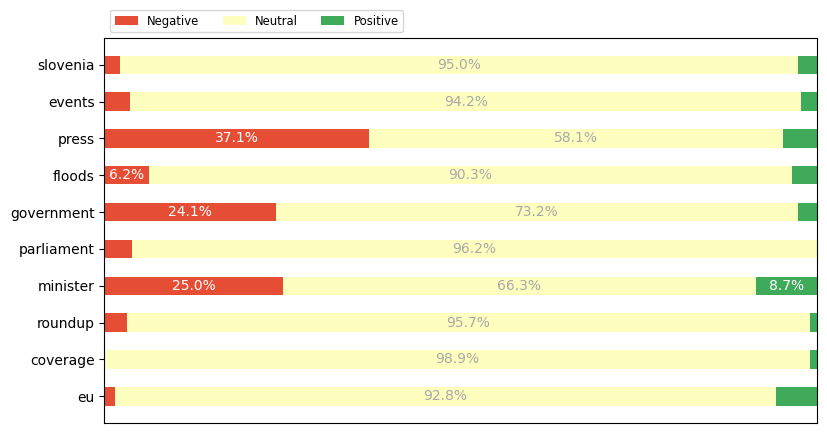

In [3]:
plot_aspect_sentiment_barplot(
    df, percentage=True, by_column="keywords_sentiment", top_n=10, top_based_on="sum"
)

Here is plot presenting the same data, but using numbers of articles instead of percentages.

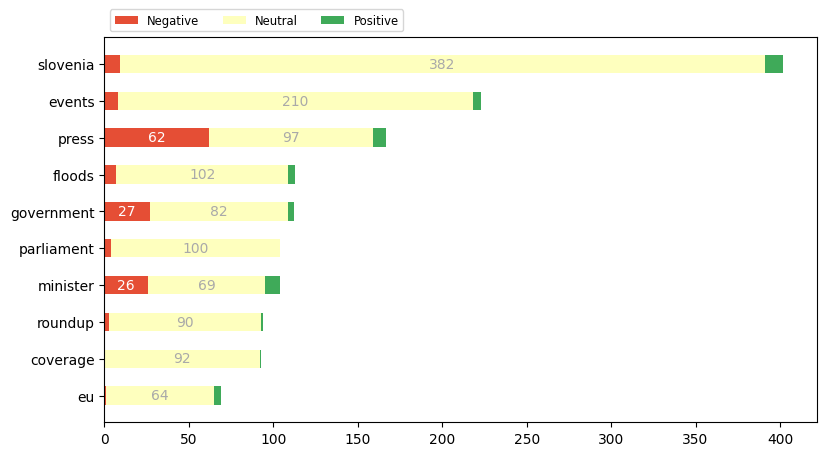

In [4]:
plot_aspect_sentiment_barplot(
    df, percentage=False, by_column="keywords_sentiment", top_n=10, top_based_on="sum"
)

It is also possible to select top keywords based on their negativity (or neutrality, or possibility) - it can be done based on number of articles or percentages. Plot below shows sentiment across keywords that are most often negative (but taking into account only these keywords that appeared at least 5 times in news).

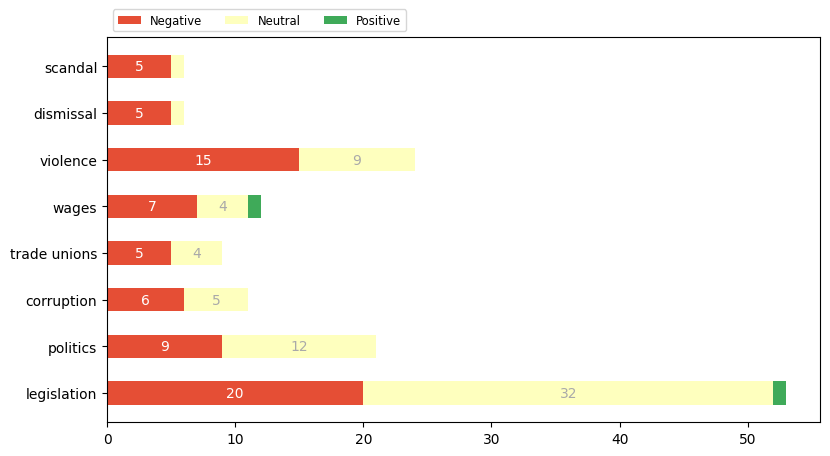

In [5]:
plot_aspect_sentiment_barplot(
    df,
    percentage=False,
    by_column="keywords_sentiment",
    top_n=8,
    top_based_on=0,
    based_on_percentage=True,
    min_n_to_consider=5,
)

Below is the same type of plot, but for keywords that were mostly positive.

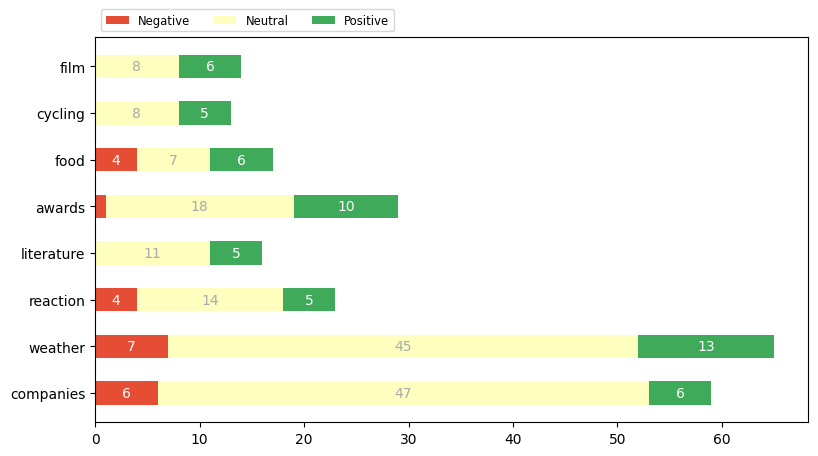

In [6]:
plot_aspect_sentiment_barplot(
    df,
    percentage=False,
    by_column="keywords_sentiment",
    top_n=8,
    top_based_on=2,
    based_on_percentage=True,
    min_n_to_consider=5,
)

## Sentiment by found named entities

Here are plots that present most common NER among English news, and aspect based sentiment predicted for these entities. We select only top 10 most common entities, but it can be changed with *top_n* parameter.

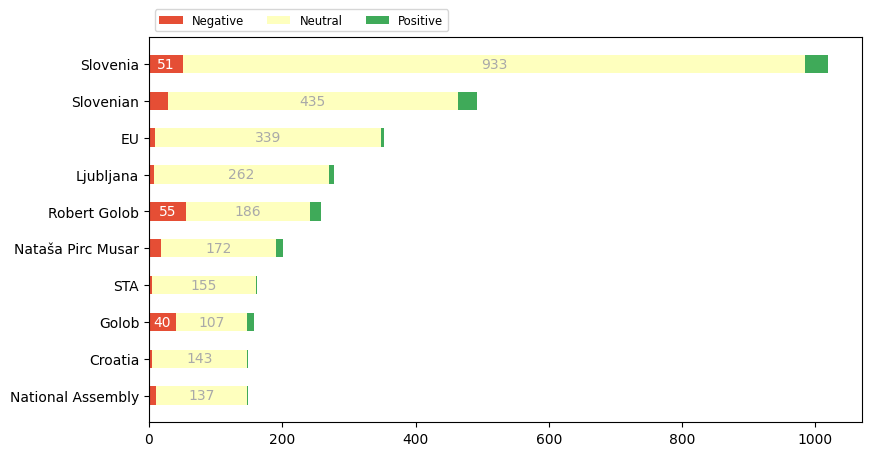

In [7]:
plot_aspect_sentiment_barplot(
    df, percentage=False, by_column="ner_sentiment", top_n=10, top_based_on="sum"
)

Here are presented the same data, but with percentages instead of numbers.

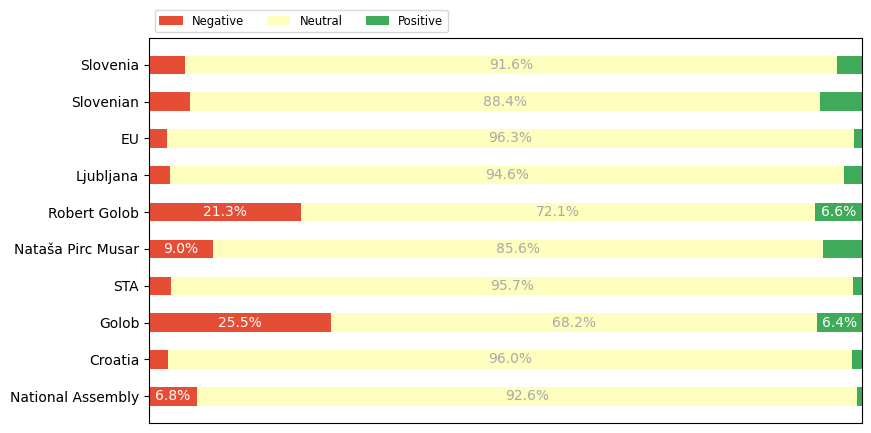

In [8]:
plot_aspect_sentiment_barplot(
    df, percentage=True, by_column="ner_sentiment", top_n=10, top_based_on="sum"
)

In [9]:
df = pd.read_csv(
    "full_dataseet_overall_sentiment_700.csv"
)  # Again, we do not share the file as it contains sensitive data
df = correct_literals(df)
df["sentiment"] = None
df.loc[df["overall_sentiment"] == 0, "sentiment"] = "Negative"
df.loc[df["overall_sentiment"] == 1, "sentiment"] = "Positive"

We predict overall articles' sentiments and group it by categories. We can observe, which categories are more negative, and which are more positive (or neutral). 

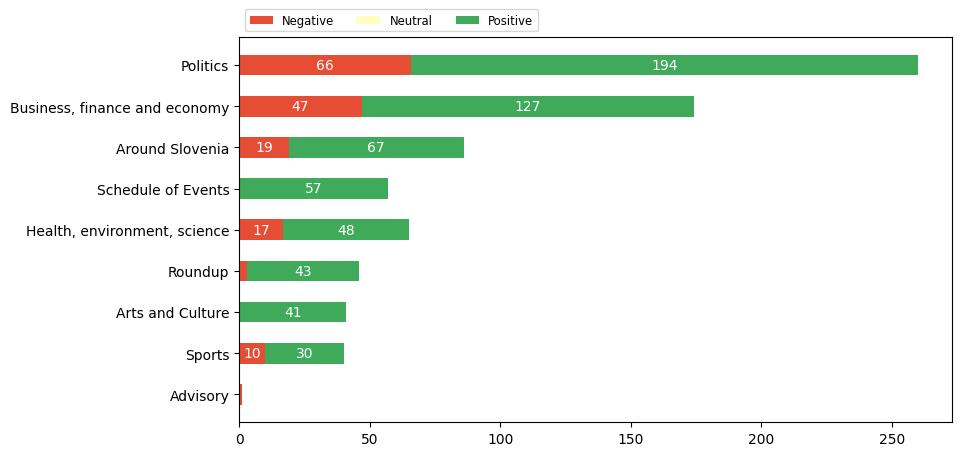

In [10]:
plot_sentiment_barplot(df, by_column="categories", percentage=False, top_n=None)

It can also be plotted with percentages, we limit here for top 8 categories due to very low number of Advisory news in our dataframe.

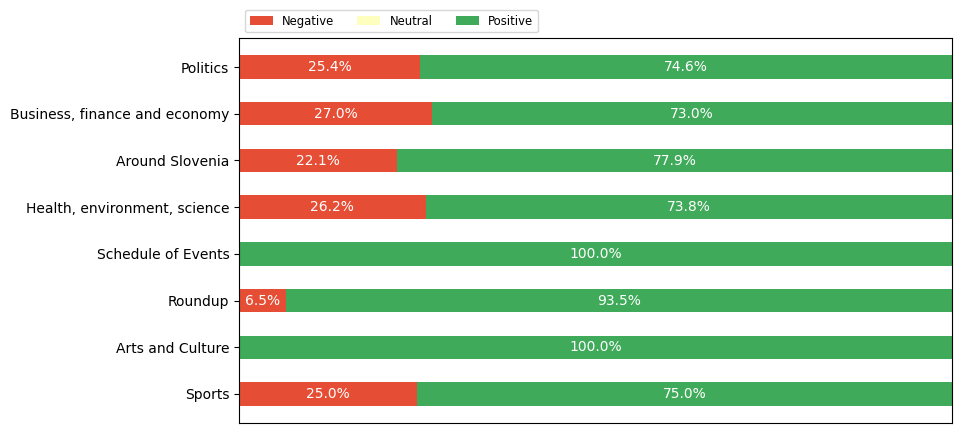

In [11]:
plot_sentiment_barplot(df, by_column="categories", percentage=True, top_n=8)

We can also see which authors put sentiments in their news by using byline data from STA API. We won't share the result of such data here, as it might be sensitive. One can run it by loading appropriate dataframe (only if you have access to STA data) and uncommenting the line below.

In [12]:
# plot_sentiment_barplot(df, by_column="byline", percentage=False, top_n=10)

In [13]:
df = df.loc[df["sentiment"].notna()]

Another possibility with our solution is monitoring how sentiment changes over the time. As previously, you can specify if you want to see the numbers of articles or percentages of negatives vs positives. The plot below shows the numbers of articles by sentiment within given time period.

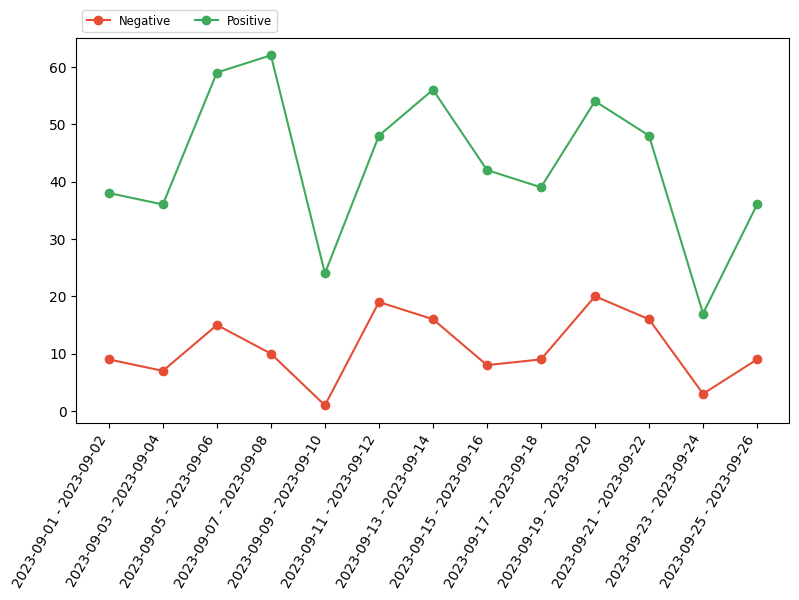

In [14]:
plot_sentiment_over_time(
    df,
    interval_len=2,
    percentage=False,
    cut_last_interval=False,
    sentiments=["Negative", "Positive"],
)

It is possible to specify length of time interval in every "bucket" by *interval_len* parameter. Here, we change it to bigger number and change numbers to percentages.

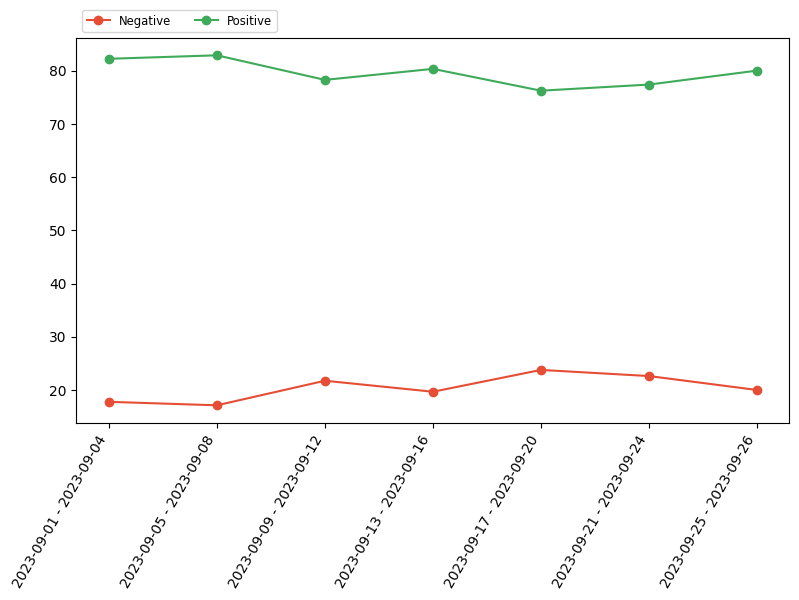

In [15]:
plot_sentiment_over_time(
    df,
    interval_len=4,
    percentage=True,
    cut_last_interval=False,
    sentiments=["Negative", "Positive"],
)